# Solutions

All code required to solve the exercises is provided on this page, with the output included by default. To use the code interactively, click {fa}`rocket` --> {guilabel}`Live Code` on the top right corner of this screen and then wait until all cells are executed. You can also download this page as a notebook to work with on your personal computer.

```{note}
On this page we adopt the notation of lower-case $q$ used in other sections of this chapter, and do not use the upper-case convention to denote a random variable.
```

First we import a few packages and define the distributions of $q_1$ and $q_2$ as described on the previous pages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

s = 0.198
loc = 0.000
scale = 98.058
q_1 = stats.lognorm(s=s, loc=loc, scale=scale)
q_2 = stats.lognorm(s=s, loc=loc, scale=scale)

## Part 1

We can use Monte Carlo simulation to evaluate the problem easily. Remember, there are four essential steps to Monte Carlo Simulation:

1. Define distributions for random variables (probability density over a domain)  
2. Generate random samples  
3. Do something with the samples (deterministic calculation)  
4. Evaluate the results: e.g., “empirical” PDF, CDF of samples, etc.

The solution below also uses the method of moments on the MCS sample to compare the Normal and Lognormal parametric distributions, as well as includes the "exact" analytic solution for Parts 2 and 3.


The 99th percentile is index: 9900
The 99th percentile from the sample is: 275.9 m^3/s.
The inverse CDF of the Normal dist gives: 266.3 m^3/s.
The inverse CDF of the LogNormal dist gives: 276.4 m^3/s.


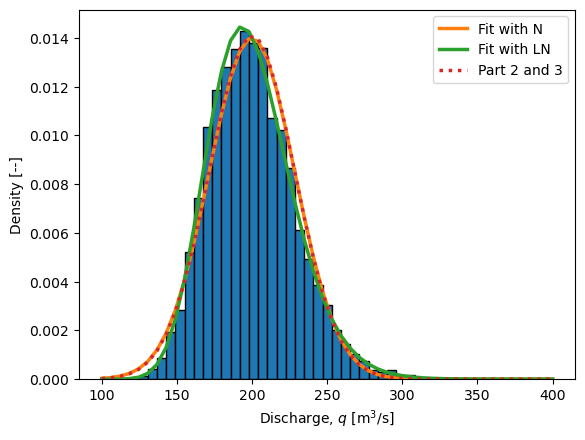

In [2]:
N = 10000
sample_1 = q_1.rvs(size=N)
sample_2 = q_2.rvs(size=N)
q = sample_1 + sample_2

q_as_N = stats.norm(*stats.norm.fit(q))
q_as_LN = stats.lognorm(*stats.lognorm.fit(q))

plot_values = np.linspace(100,400,50)
plt.hist(q, bins=plot_values,
         density=True,
         edgecolor='black')
plt.plot(plot_values, q_as_N.pdf(plot_values),
         linewidth=2.5, label='Fit with N')
plt.plot(plot_values, q_as_LN.pdf(plot_values),
         linewidth=2.5, label='Fit with LN')
plt.plot(plot_values,
         stats.norm.pdf(plot_values, loc=200, scale=np.sqrt(800)),
         ':', linewidth=2.5, label='Part 2 and 3')
plt.xlabel('Discharge, $q$ [m$^3$/s]')
plt.ylabel('Density [--]')
plt.legend()

get_index = int(np.floor(0.99*(N + 1)))
print(f'The 99th percentile is index: {get_index}')
q_percentile = np.sort(q)[get_index - 1]
print(f'The 99th percentile from the sample is: {q_percentile:.1f} m^3/s.')
print(f'The inverse CDF of the Normal dist gives: {q_as_N.ppf(0.99):.1f} m^3/s.')
print(f'The inverse CDF of the LogNormal dist gives: {q_as_LN.ppf(0.99):.1f} m^3/s.')

plt.show()

## Part 2 and 3

Error propagation, as introduced in previous chapters, is a method that relies on a linearized approximation of the function of random variables and assumes that the random variables themselves are normally distributed. This results in the relatively simple equations for computing the moments of the function based on the moments of the random variables, applied below. In this case, since we are only using the moments of the lognormal variables in Part 2, the distribution is identical to that described by Part 3, so the solution is the same.

The expectation is simply:

$$
\mathbb{E}(q(q_1,q_2))= q(\mu_{q_1},\mu_{q_2}) = \mu_{q_1} + \mu_{q_2}
$$

And, given independent random variables, the variance is:

$$
\sigma_q^2 = \sigma_{q_1}^2 + \sigma_{q_2}^2
$$

The partial derivatives have been left out, as they are all +1, and the covariance term is zero. Plugging in values from the exercise:

$$
\mathbb{E}(q)= 100 + 100 = 200
$$

And the variance:

$$
\sigma_q^2 = 400 + 400 = 800
$$

Finally, we can compare the distibution to those found above (see figure). The two normal distributions are very similar to each other, which tells us that the asymettry of the lognormal distribution does not have a big influence on the distribution of $q$.

## Part 4

Here we will use the analytically computed value of the distribution of $q$ and compare the design value $q_{design}$ to the value found with a Monte Carlo Simulation using `scipy.stats.multivariate_norm` and a covariance matrix to generate a plot and compute values. The solution is more complicated that you were expected to provide, in order to illustrate various approaches and insights.

First we find the variance of $q$, which adds an additional term now that the random variables are dependent:

$$
\sigma_q^2 = \sigma_{q_1}^2 + \sigma_{q_2}^2 + 2\sigma_{q_1}\sigma_{q_2}\rho_{q_1,q_2}
$$

Resulting in:

$$
\sigma_q^2 = 400 + 400 + 2 \cdot 20 \cdot 20 \rho_{q_1,q_2} = 800(1+\rho_{q_1,q_2})
$$

Design values are computed below, and as the plot illustrates, increasing correlation coefficient results in a higher likelihood of observing high values of $q$, and therefore the design value increases. The opposite is true with no dependence, as well as negative dependence.

The code cell below does the following:
- define the analytically derived moments of $q$
- set up the expectation and covariance matrix for $q_1$ and $q_2$
- sample from the joint distribution of $q_1$ and $q_2$ and compute the corresponding sample of $q$
- evalue the empirical design value, $q_{design}$
- print and plot relevant results

_Change the values in the cell below to explore the problem, especially $\rho$ and $N$, which can have profound influences on the result: $q_{design}$ and the accuracy of the MCS, respectively._

The correlation coefficient is: 0.50
The mean value of q is: 200
The variance of q is: 1200.0
The design value for q~N(mu,sigma) is:  280.6 m^3/s

For N = 10000 samples, the 99th percentile is index: 9900
The 99th percentile from the sample is: 279.3 m^3/s
    ^ this is the 1% design value, q_design, from MCS



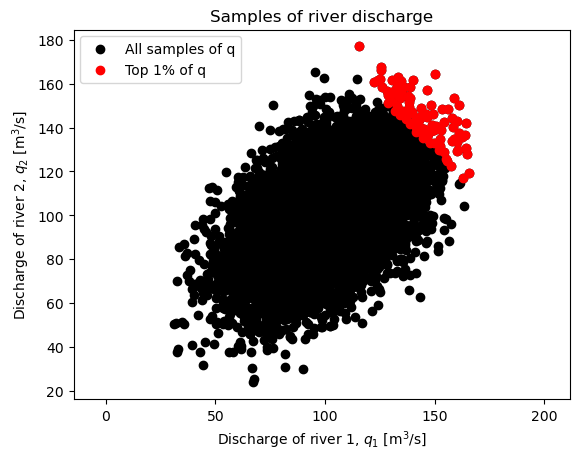

In [3]:
rho = +.50
N = 10000

mu_q = 200
var_q = 800*(1 + rho)

mu_q1q2 = np.array([100, 100])
cov_q1q2 = 400*np.array([[1, rho],
                         [rho, 1]])

q1q2 = stats.multivariate_normal(mu_q1q2, cov_q1q2)
sample = q1q2.rvs(size=N)

q_1_dependent = sample[:,0]
q_2_dependent = sample[:,1]
q_dependent = q_1_dependent + q_2_dependent

get_index = int(np.floor(0.99*(N + 1)))
q_percentile = np.sort(q_dependent)[get_index - 1]

fig, ax = plt.subplots()
ax.scatter(q_1_dependent, q_2_dependent,
           color='black', label='All samples of q')
ax.scatter(q_1_dependent[q_dependent>q_percentile],
           q_2_dependent[q_dependent>q_percentile],
           color='red', label='Top 1% of q')

print(f'The correlation coefficient is: {rho:.2f}')
print(f'The mean value of q is: {mu_q}')
print(f'The variance of q is: {var_q:.1f}')
print(f'The design value for q~N(mu,sigma) is: ',
      f'{stats.norm.ppf(0.99, loc=mu_q, scale=np.sqrt(var_q)):.1f} m^3/s\n')
print(f'For N = {N} samples, the 99th percentile is index: {get_index}')
print(f'The 99th percentile from the sample is: {q_percentile:.1f} m^3/s')
print('    ^ this is the 1% design value, q_design, from MCS\n')

plt.xlabel('Discharge of river 1, $q_1$ [m$^3$/s]')
plt.ylabel('Discharge of river 2, $q_2$ [m$^3$/s]')
plt.title('Samples of river discharge')
ax.axis('equal');
ax.legend()
plt.show()